In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
from matplotlib_venn import venn2
import seaborn as sb

In [2]:
dir_fig = 'plots_trs/'

In [3]:
file_cov = '/expanse/projects/sebat1/s3/data/sebat/long_reads_pipeline_results/coverages_mod.tsv'
#file_cov = '/tscc/projects/ps-sebat1/s3/data/sebat/long_reads_pipeline_results/coverages_mod.tsv'
df_cov = pd.read_table(file_cov, header=0, sep='\t')
multiplat_samples = ['REACH000236', 'REACH000530', 'REACH000531', 'REACH000532', 'REACH000436']
df_cov['SAMPLE'] = df_cov.apply(lambda row: row['SAMPLE']+'_'+row['COHORT'] if row['SAMPLE'] in multiplat_samples else row['SAMPLE'], axis=1)
df_cov_high = df_cov.loc[df_cov.SAMPLE.str.startswith('REACH000') & (df_cov.MEAN_COVERAGE > 9)]
display(df_cov)
high_cov_samples = df_cov_high.SAMPLE.tolist()
#print(high_cov_samples)

def get_plat(sample):
    try:
        ret = df_cov[df_cov.SAMPLE == sample]['COHORT'].values[0]
    except:
        print(f'problem with samples: {sample}')
        ret = ''
    return ret

def get_cov(sample, plat):
    try:
        ret = df_cov[(df_cov.SAMPLE == sample) & (df_cov.COHORT == plat)]['MEAN_COVERAGE'].values[0]
    except:
        print(f'problem with samples: {sample}')
        ret = ''
    return ret

plat_dict = {sample: get_plat(sample) for sample in df_cov.SAMPLE.tolist()}

,SAMPLE,COHORT,MEAN_COVERAGE
0,HG004,ONT,81.44
1,REACH000626,ONT,10.51
2,REACH000546,ONT,10.87
3,REACH000683,ONT,9.97
4,REACH000563,ONT,8.68
...,...,...,...
283,REACH000284,PB,3.43
284,REACH000672,PB,5.02
285,REACH000292,PB,9.00
286,REACH000066,PB,1.61


In [6]:
file_name = 'test.tsv'
df = pd.read_table(file_name, sep='\t', header=0, keep_default_na=False)

/scratch/smmortazavi/job_31910806/ipykernel_1078237/2698159180.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(file_name, sep='\t', header=0, keep_default_na=False)


plots_trs/hist_samples_genotyped.png


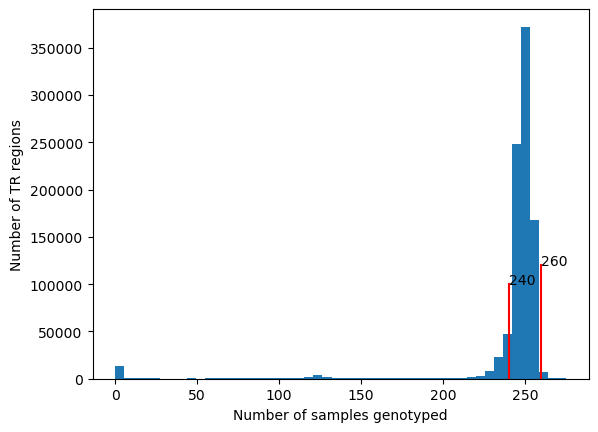

In [5]:
# plot histogram of the number of samples genotyped
plt.figure()
plt.hist(df.SN_GB, bins=50)
x_lim = 240
y_lim = 100000
plt.plot([x_lim, x_lim], [0, y_lim], '-r')
plt.text(x_lim, y_lim, f'{x_lim}')

x_lim = 260
y_lim = 120000
plt.plot([x_lim, x_lim], [0, y_lim], '-r')
plt.text(x_lim, y_lim, f'{x_lim}')

#plt.plot([60, 60], [0, 75000], '--r')
#plt.text(60, 75000, '60')
plt.xlabel('Number of samples genotyped')
plt.ylabel('Number of TR regions')
fig_name = dir_fig+'hist_samples_genotyped.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()



plots_trs/hist_middle_peak_chroms.png


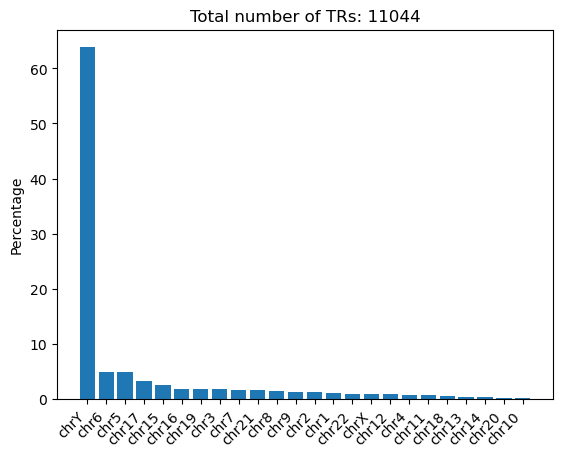

plots_trs/hist_left_peak_chrom_loc.png


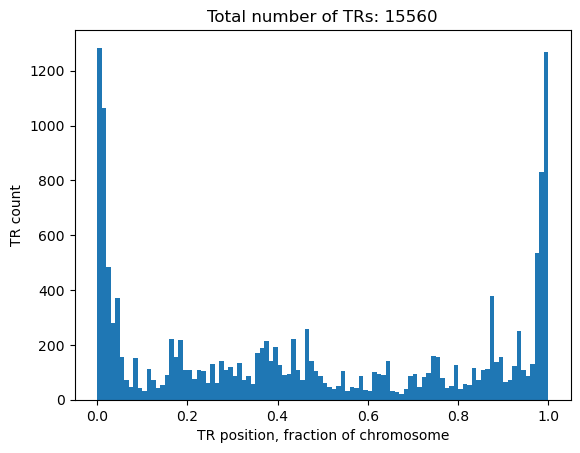

In [8]:
file_chr_size = '/expanse/projects/sebat1/miladm/UCSD/reference_genomes/hg38.chrom.sizes'
df_chr_size = pd.read_table(file_chr_size, sep='\t', header=None, names=['chrom', 'size'], index_col=0)
#display(df_chr_size)

# characterizing the other middle peak
df_flt = df.loc[(df.SN_GB >=100)&(df.SN_GB <=150)].copy()
#display(df_flt)
N_tot = df_flt.shape[0]
counts = df_flt.CHROM.value_counts()
counts_pct = counts / N_tot * 100
#display(counts_pct)
plt.figure()
plt.bar(x=counts_pct.index.tolist(), height=counts_pct)
#plt.xlabel('TR position, fraction of chromosome')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage')
plt.title(f'Total number of TRs: {df_flt.shape[0]}')
fig_name = dir_fig+'hist_middle_peak_chroms.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

# characterizing the other zero peak
df_flt = df.loc[(df.SN_GB <=25)].copy()
df_flt['chrom_size'] = df_flt['CHROM'].map(df_chr_size['size'])
df_flt['pos_pct'] = df_flt.POS / df_flt['chrom_size']
#display(df_flt)

plt.figure()
plt.hist(df_flt.pos_pct, bins=100)
plt.xlabel('TR position, fraction of chromosome')
plt.ylabel('TR count')
plt.title(f'Total number of TRs: {df_flt.shape[0]}')
fig_name = dir_fig+'hist_left_peak_chrom_loc.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()


plots_trs/hist_zscore.png


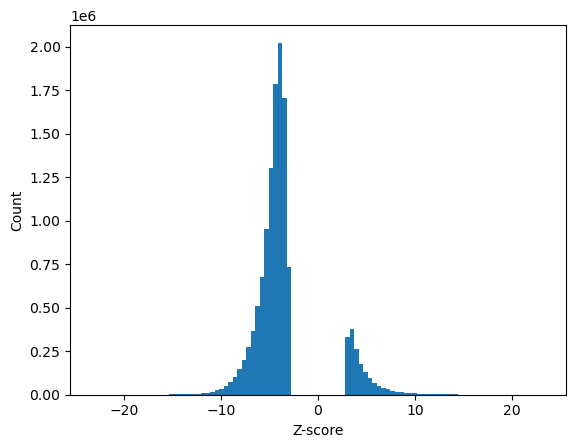

plots_trs/hist_bp_dev_lzs12.png


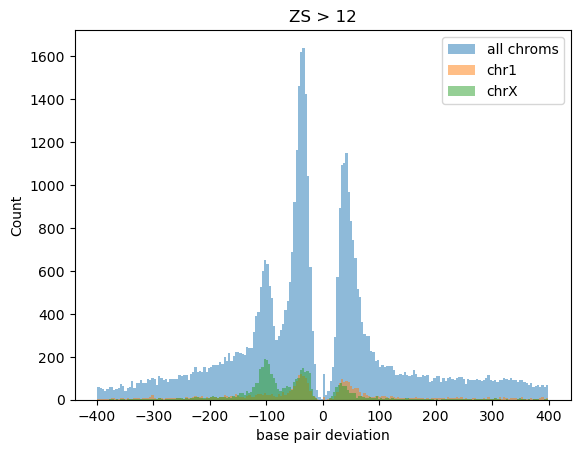

plots_trs/hist_bp_dev_lzs11.png


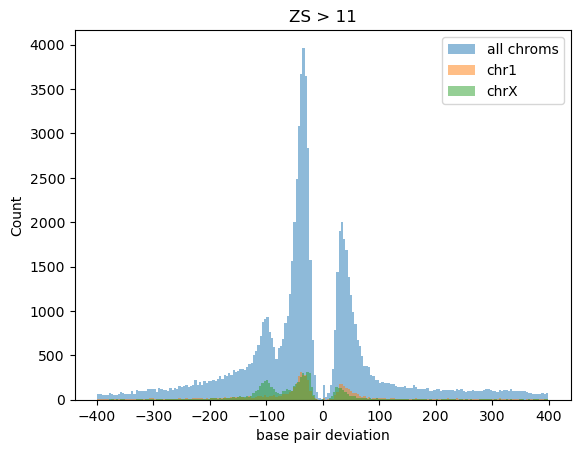

plots_trs/hist_bp_dev_lzs10.png


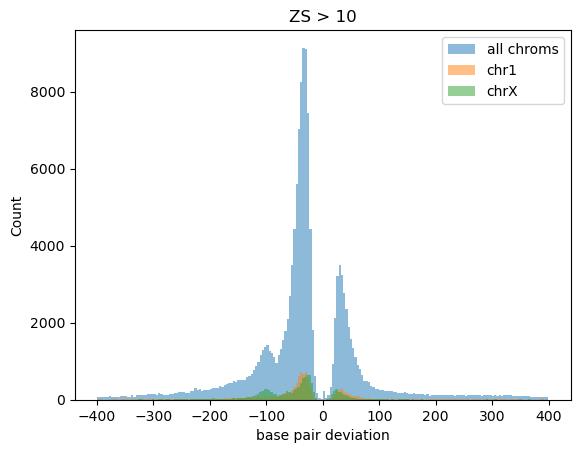

plots_trs/hist_bp_dev_lzs9.png


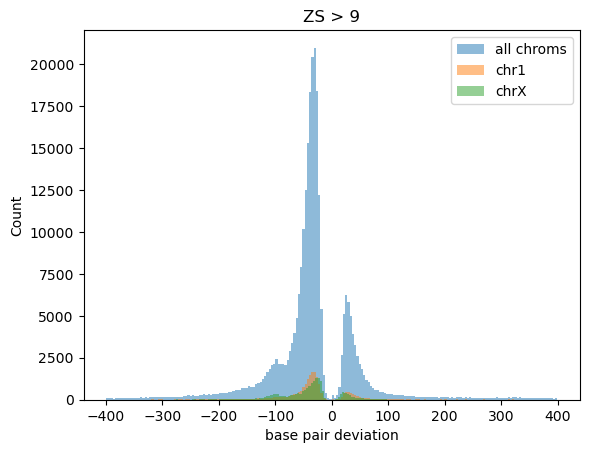

plots_trs/hist_bp_dev_lzs7.png


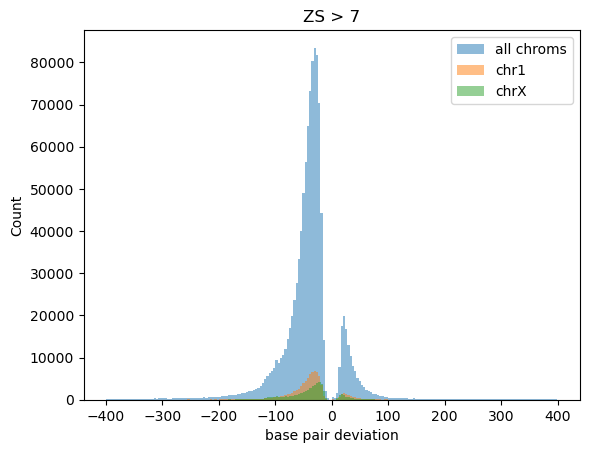

plots_trs/hist_bp_dev_lzs5.png


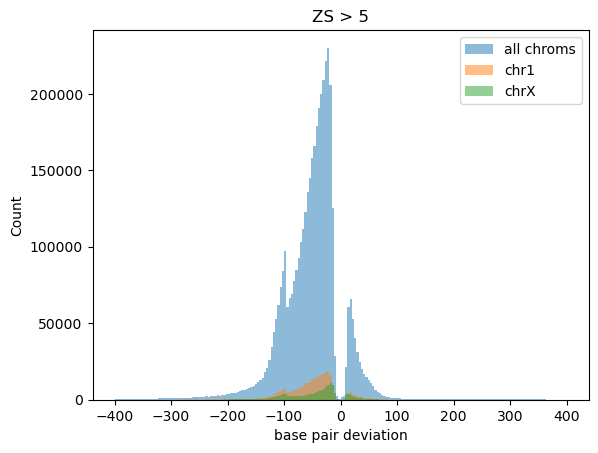

plots_trs/hist_bp_dev_lzs3.png


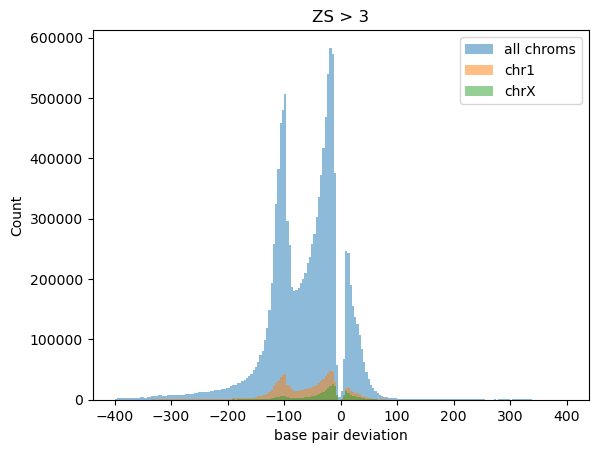

In [12]:
file_name = 'zs_large_3.txt'
df_zs = pd.read_table(file_name, sep='\t', names=['ID', 'Z-score', 'GB', 'SAMPLE'])
df_zs['chrom'] = df_zs['ID'].map(lambda x: x.split('_')[0])
#display(df_zs)
plt.figure()
bins = 100
plt.hist(df_zs['Z-score'], bins=bins)
plt.xlabel('Z-score')
plt.ylabel('Count')
fig_name = dir_fig+'hist_zscore.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

for z_thr in [12, 11, 10, 9, 7, 5, 3]:
    plt.figure()
    bp_thr = 400
    bins = 200
    plt.hist(df_zs.loc[(df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<bp_thr)]['GB'], bins=bins, label='all chroms', alpha=.5)
    plt.hist(df_zs.loc[(df_zs.chrom=='chr1') & (df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<bp_thr)]['GB'], bins=bins, label='chr1', alpha=.5)
    plt.hist(df_zs.loc[(df_zs.chrom=='chrX') & (df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<bp_thr)]['GB'], bins=bins, label='chrX', alpha=.5)
    plt.xlabel('base pair deviation')
    plt.ylabel('Count')
    plt.title(f'ZS > {z_thr}')
    plt.legend()
    fig_name = dir_fig+f'hist_bp_dev_lzs{z_thr}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()

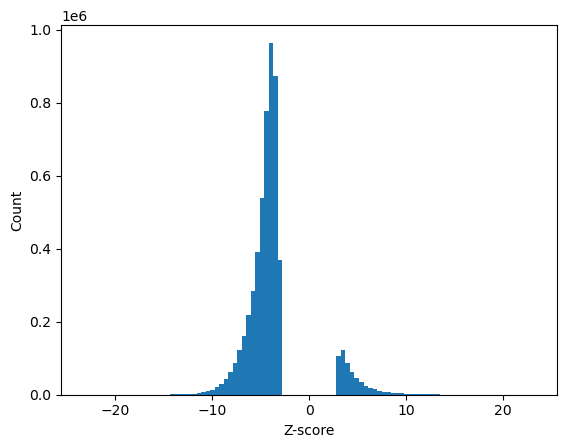

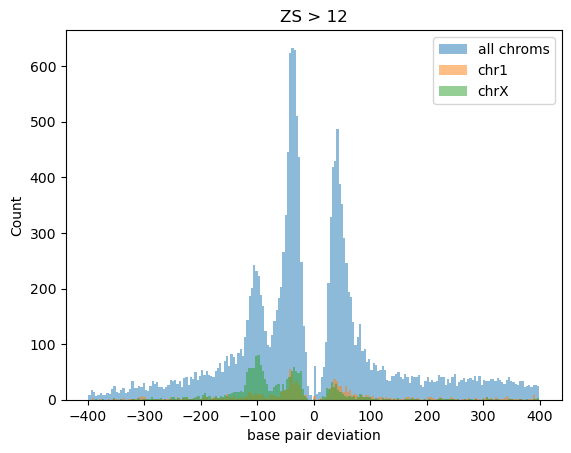

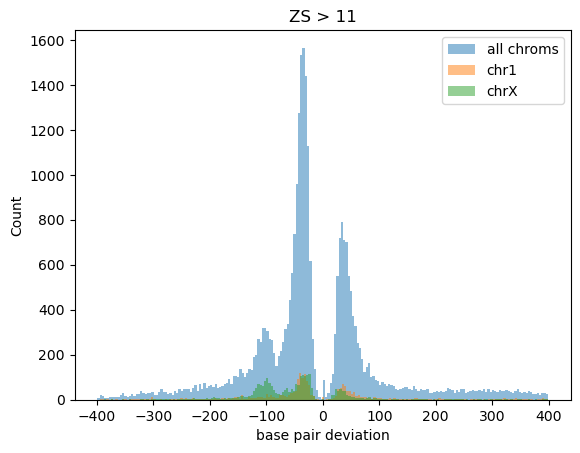

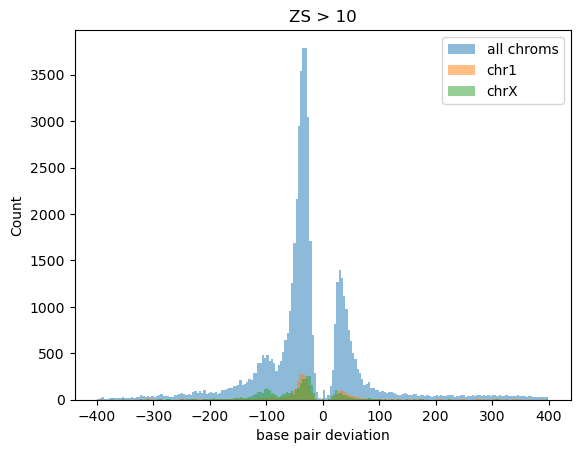

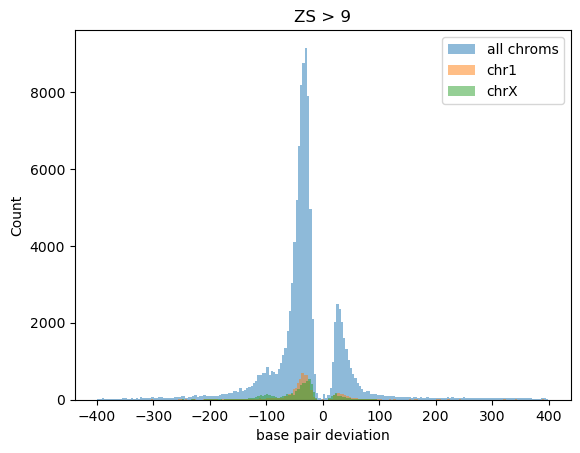

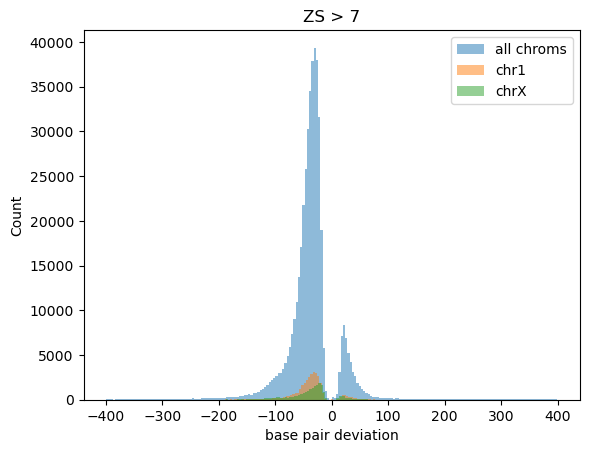

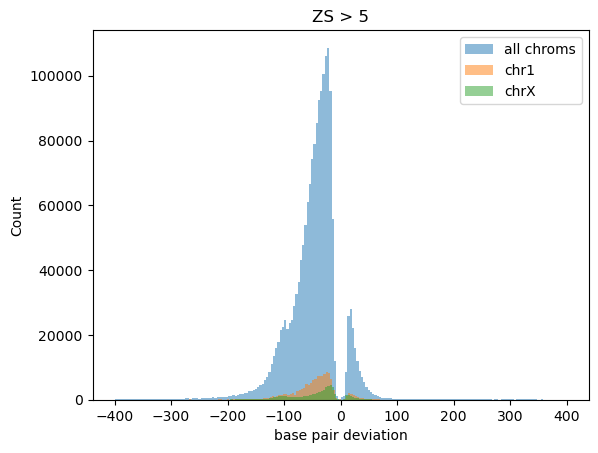

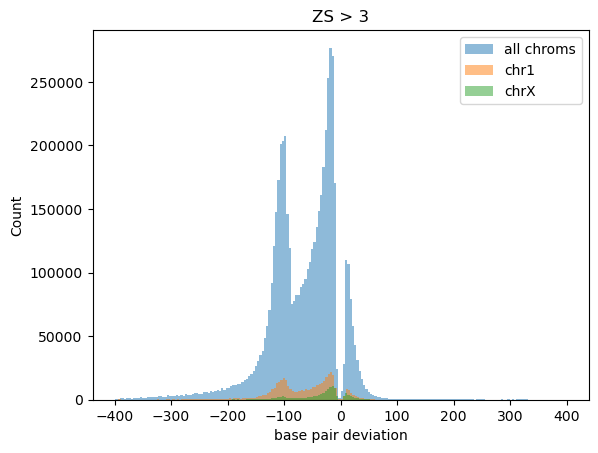

In [11]:
# this was to examine TRs which are not close to SINE or LINEs to see if they have the peaks
file_name = 'out.bed'
df_zs = pd.read_table(file_name, sep='\t', names=['chrom', 'pos', 'end', 'ID', 'Z-score', 'GB'])
#display(df_zs)
plt.figure()
bins = 100
plt.hist(df_zs['Z-score'], bins=bins)
plt.xlabel('Z-score')
plt.ylabel('Count')
#fig_name = dir_fig+'hist_zscore.png'
#print(fig_name)
#plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

for z_thr in [12, 11, 10, 9, 7, 5, 3]:
    plt.figure()
    bp_thr = 400
    bins = 200
    plt.hist(df_zs.loc[(df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<bp_thr)]['GB'], bins=bins, label='all chroms', alpha=.5)
    plt.hist(df_zs.loc[(df_zs.chrom=='chr1') & (df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<bp_thr)]['GB'], bins=bins, label='chr1', alpha=.5)
    plt.hist(df_zs.loc[(df_zs.chrom=='chrX') & (df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<bp_thr)]['GB'], bins=bins, label='chrX', alpha=.5)
    plt.xlabel('base pair deviation')
    plt.ylabel('Count')
    plt.title(f'ZS > {z_thr}')
    plt.legend()
    #fig_name = dir_fig+f'hist_bp_dev_lzs{z_thr}.png'
    #print(fig_name)
    #plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()

In [10]:
z_thr = 12
dbp1 = -120
dbp2 = -80
for z_thr in [3, 5, 7, 9, 10, 11, 12]:
    this_df = df_zs.loc[(df_zs['Z-score'].abs()>z_thr) & (df_zs.GB>dbp1) & (df_zs.GB<dbp2)].copy()
    this_df['chrom'] = this_df['ID'].map(lambda x: x.split('_')[0])
    this_df['pos'] = this_df['ID'].map(lambda x: x.split('_')[1]).astype(int)
    this_df['end'] = this_df['ID'].map(lambda x: x.split('_')[2]).astype(int)
    this_df['chrom_size'] = this_df['chrom'].map(df_chr_size['size'])
    this_df['pos_pct'] = this_df.pos / this_df.chrom_size
    display(this_df.shape)
    #display(this_df)
    order_cols = ['chrom', 'pos', 'end', 'chrom_size', 'pos_pct', 'ID', 'Z-score', 'GB']
    this_df[order_cols].to_csv(f'temp_m100Peak_Z{z_thr}.tsv', sep='\t', index=None)

(3286198, 8)

(668025, 8)

(78637, 8)

(19504, 8)

(11425, 8)

(7002, 8)

(4770, 8)

In [18]:
order_cols = ['CHROM', 'POS', 'END', 'ID']
df[order_cols].to_csv(f'temp_all_TRs.tsv', sep='\t', index=None)

(3286198, 9)

,ID,Z-score,GB,SAMPLE,chrom,pos,end,chrom_size,pos_pct
90,chr1_44805_44906,-8.20,-89,REACH000542,chr1,44805,44906,248956422,0.000180
91,chr1_44805_44906,-8.20,-89,REACH000543,chr1,44805,44906,248956422,0.000180
92,chr1_44805_44906,-8.20,-89,REACH000547,chr1,44805,44906,248956422,0.000180
93,chr1_44805_44906,-8.20,-89,REACH000564,chr1,44805,44906,248956422,0.000180
94,chr1_44805_44906,-8.20,-89,REACH000566,chr1,44805,44906,248956422,0.000180
...,...,...,...,...,...,...,...,...,...
12722095,chrY_26412541_26412624,-10.56,-92,REACH000425,chrY,26412541,26412624,57227415,0.461537
12722241,chrY_26556341_26556452,-7.70,-119,REACH000483,chrY,26556341,26556452,57227415,0.464049
12722242,chrY_26556341_26556452,-7.70,-119,REACH000564,chrY,26556341,26556452,57227415,0.464049
12722261,chrY_26573644_26573730,-10.88,-96,REACH000421,chrY,26573644,26573730,57227415,0.464352


plots_trs/peak_100_hist_chroms_ZS3.png


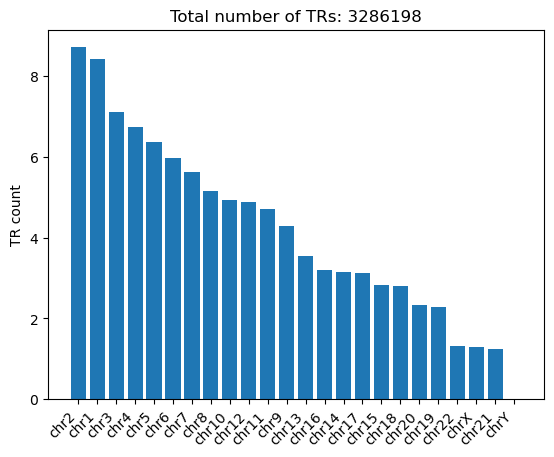

plots_trs/peak_100_hist_chrom_loc_ZS3.png


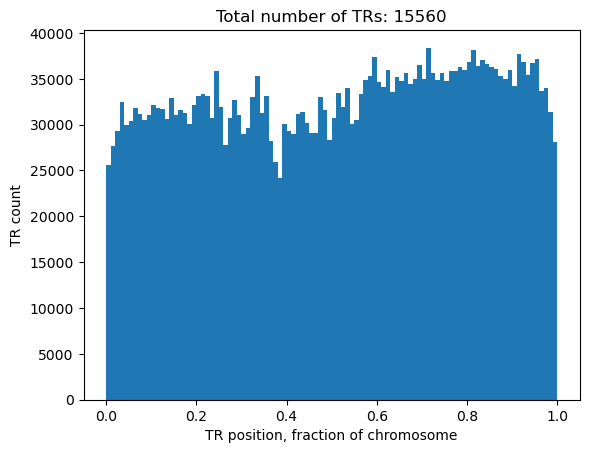

plots_trs/samples_lzs3


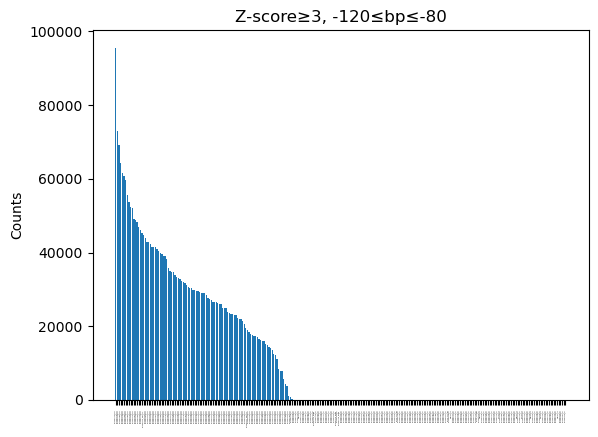

In [35]:
z_thr = 3
dbp1 = -120
dbp2 = -80
this_df = df_zs.loc[(df_zs['Z-score'].abs()>z_thr) & (df_zs.GB>dbp1) & (df_zs.GB<dbp2)].copy()
this_df['chrom'] = this_df['ID'].map(lambda x: x.split('_')[0])
this_df['pos'] = this_df['ID'].map(lambda x: x.split('_')[1]).astype(int)
this_df['end'] = this_df['ID'].map(lambda x: x.split('_')[2]).astype(int)
this_df['chrom_size'] = this_df['chrom'].map(df_chr_size['size'])
this_df['pos_pct'] = this_df.pos / this_df.chrom_size
#this_df.to_csv(dir_fig+'peak_100.txt', sep='\t', index=None, header=True)
display(this_df.shape)
display(this_df)
order_cols = ['chrom', 'pos', 'end', 'chrom_size', 'pos_pct', 'ID', 'Z-score']
this_df[order_cols].to_csv(f'temp_m100Peak_Z{z_thr}.tsv', sep='\t', index=None)

N_tot = this_df.shape[0]
counts_chrom = this_df.chrom.value_counts()
counts_pct = counts_chrom / N_tot * 100

plt.figure()
plt.bar(x=counts_pct.index.tolist(), height=counts_pct)
plt.xticks(rotation=45, ha='right')
plt.ylabel('TR count')
plt.title(f'Total number of TRs: {this_df.shape[0]}')
fig_name = dir_fig+f'peak_100_hist_chroms_ZS{z_thr}.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

### is it near telomeres...
plt.figure()
plt.hist(this_df.pos_pct, bins=100)
plt.xlabel('TR position, fraction of chromosome')
plt.ylabel('TR count')
plt.title(f'Total number of TRs: {df_flt.shape[0]}')
fig_name = dir_fig+f'peak_100_hist_chrom_loc_ZS{z_thr}.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

# which samples have the deviations
count_nums = this_df.SAMPLE.value_counts().tolist()
count_samples = [f'{x}|{get_plat(x)}' for x in this_df.SAMPLE.value_counts().index.get_level_values(0).tolist()]
fig, ax = plt.subplots()
ax.bar(count_samples, count_nums)
ax.set_xticks(count_samples, count_samples, rotation=90, fontsize=1)
ax.set_aspect('auto')
plt.ylabel('Counts')
plt.title(f'Z-score≥{z_thr}, {dbp1}≤bp≤{dbp2}')
fig_name = dir_fig+f'samples_lzs{z_thr}'
print(fig_name)
plt.savefig(fig_name+'.png', bbox_inches='tight')
plt.savefig(fig_name+'.pdf', bbox_inches='tight')
plt.show()
plt.close()

,ID,MEAN,STD
0,chr1_705499_705585,-0.59,5.92
1,chr1_2865247_2865341,-0.94,6.27
2,chr1_3010390_3010752,-0.18,8.94
3,chr1_3143434_3143518,-0.40,4.92
4,chr1_5458117_5458607,-0.53,7.17
...,...,...,...
3645,chrX_155724603_155724698,-0.27,5.52
3646,chrX_155907767_155908201,-0.67,8.58
3647,chrX_155950733_155951140,-0.65,7.45
3648,chrX_156028580_156028780,-0.69,5.12


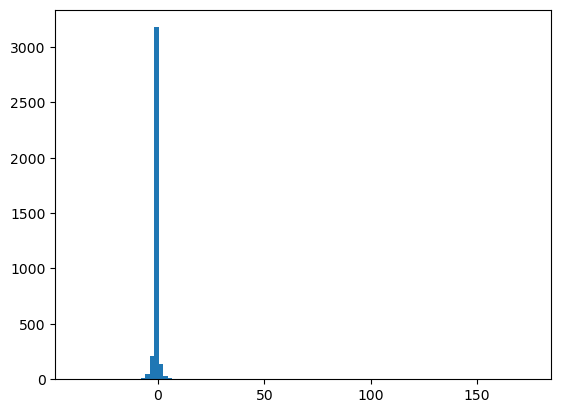

In [15]:
file_mean_std = 'mean_std_m100Peak.tsv'
df_mean_std = pd.read_table(file_mean_std, sep='\t', names=['ID', 'MEAN', 'STD'])
display(df_mean_std)

plt.figure()
plt.hist(df_mean_std.loc[df_mean_std.MEAN<200].MEAN, bins=100)
#plt.xlabel('TR position, fraction of chromosome')
#plt.ylabel('TR count')
#plt.title(f'Total number of TRs: {df_flt.shape[0]}')
#fig_name = dir_fig+f'peak_100_hist_chrom_loc_ZS{z_thr}.png'
#print(fig_name)
#plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

,sample,Num_TRs
0,REACH000729,3
1,REACH000700,8
2,REACH000728,167
3,2323-2-1,13706
4,REACH000751,77874
...,...,...
273,REACH000400,899932
274,REACH000428,900251
275,REACH000476,900710
276,REACH000427,900921


,sample,Num_TRs,SAMPLE,COHORT,MEAN_COVERAGE
0,REACH000729,3,REACH000729,PB,0.00
1,REACH000700,8,REACH000700,PB,0.00
2,REACH000728,167,REACH000728,PB,0.00
3,2323-2-1,13706,2323-2-1,PB,0.02
4,REACH000751,77874,REACH000751,PB,0.09
...,...,...,...,...,...
273,REACH000400,899932,REACH000400,ONT,10.99
274,REACH000428,900251,REACH000428,ONT,19.66
275,REACH000476,900710,REACH000476,ONT,14.20
276,REACH000427,900921,REACH000427,ONT,20.15


plots_trs/ntrs_vs_cov.png


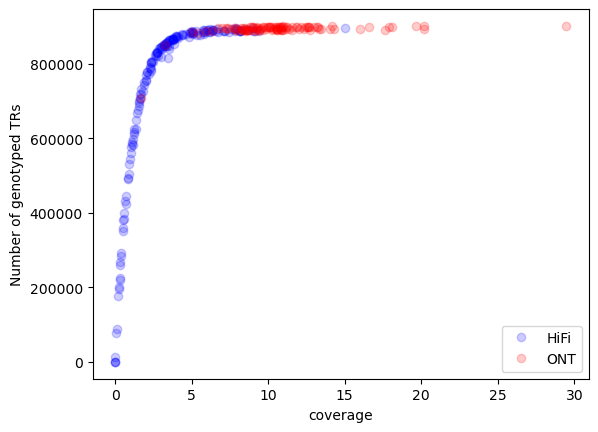

In [23]:
file_ntrs = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/TRs_LongTR/PB_ONT/tmp/gt_counts.tsv'
df_ntrs = pd.read_table(file_ntrs, sep='\t', names=['sample', 'Num_TRs'])
display(df_ntrs)

df_merge = df_ntrs.merge(df_cov, how='left', left_on='sample', right_on='SAMPLE')
display(df_merge)

df_merge.Num_TRs = pd.to_numeric(df_merge.Num_TRs)
df_merge['cov'] = pd.to_numeric(df_merge['MEAN_COVERAGE'])

plt.figure()
plat = 'PB'
plt.plot(df_merge.loc[df_merge.COHORT==plat]['cov'], df_merge.loc[df_merge.COHORT==plat]['Num_TRs'], 'ob', label='HiFi', alpha=.2)
plat = 'ONT'
plt.plot(df_merge.loc[df_merge.COHORT==plat]['cov'], df_merge.loc[df_merge.COHORT==plat]['Num_TRs'], 'or', label='ONT', alpha=.2)
plt.xlabel('coverage')
plt.ylabel('Number of genotyped TRs')
plt.legend()
fig_name = dir_fig+'ntrs_vs_cov.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

In [4]:
# temperarily:
file_name = 'old_addedGene/test.tsv'
df = pd.read_table(file_name, sep='\t', header=0, keep_default_na=False)

/tmp/ipykernel_1437230/4033077882.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(file_name, sep='\t', header=0, keep_default_na=False)


cds_sum: 16424
utr_sum: 17614
intron_sum: 388757
intgenic_sum: 495762
plots_trs/TR_genomic_regions.png


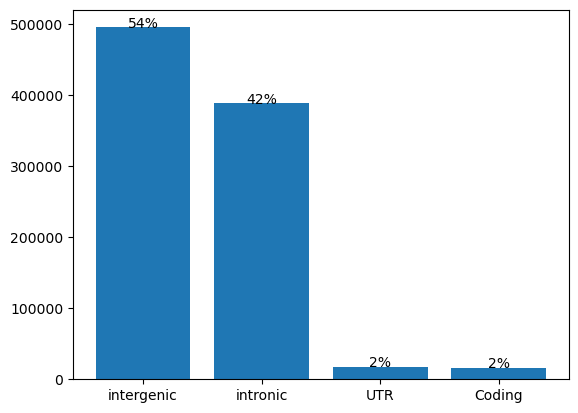

In [11]:
gc_counts = df.GENCODE.value_counts()
#print(gc_counts)
cds_sum = gc_counts[['CDS', 'start_codon', 'stop_codon']].sum()
utr_sum = gc_counts[['five_prime_UTR', 'three_prime_UTR', 'TSS']].sum()
intron_sum = gc_counts[['gene']].sum()
intgenic_sum = gc_counts[['CTCF-only' ,'dELS' ,'DNase-H3K4me3' ,'exon' ,'pELS' ,'PLS', '.']].sum()
print(f'cds_sum: {cds_sum}')
print(f'utr_sum: {utr_sum}')
print(f'intron_sum: {intron_sum}')
print(f'intgenic_sum: {intgenic_sum}')

x = ['intergenic' ,'intronic', 'UTR', 'Coding']
y = [intgenic_sum, intron_sum, utr_sum, cds_sum]
plt.figure()
plt.bar(x, height=y)
for i in range(len(x)):
    plt.text(x=i, y=y[i], s=f'{y[i]/np.sum(y)*100:.0f}%', ha='center')
fig_name = dir_fig+'TR_genomic_regions.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()


In [7]:
fx_id = 'chrX_147911948_147912141'
df_flt = df.loc[df.ID==fx_id]
display(df_flt)
print(df_flt.ZS_SAMPLES.tolist()[0].split(','))
# Normal FMR1 genes have 5–44 CGG repeats (15-132 bp. 132 bp is the reference genome)
# A premutation-sized repeat of 55–200 CGG repeats (extra 11-156 repeats or 33-468 bp) is associated with fragile X-associated primary ovarian insufficiency
# A full-mutation repeat size of more than 200 CGG repeats (extra 156 repeats or 468 bp) is required for a definite diagnosis of FXS
print(df_flt.LARGE50_DEV.tolist()[0].split(','))
print(df_flt.LARGE50_DEV_GB.tolist()[0].split(','))

,CHROM,POS,END,ID,GENCODE,ZS_SAMPLES,ZS_SAMPLES_NUM,SN_GB,DENOVO,DENOVO_GB,...,X_DEV_BR_GENE_40_cds,X_DEV_BR_GENE_40_utr,X_DEV_BR_GENE_40_intron,X_DEV_BR_GENE_50_cds,X_DEV_BR_GENE_50_utr,X_DEV_BR_GENE_50_intron,X_PLIp9_DEV_BR_GENE_10,X_PLIp9_DEV_BR_GENE_10_cds,X_PLIp9_DEV_BR_GENE_10_utr,X_PLIp9_DEV_BR_GENE_10_intron
907283,chrX,147911949,147912141,chrX_147911948_147912141,TSS,"REACH000451:0.15|3.85:27|90,REACH000453:0.50|3...",5,232,.,.,...,0,0,0,0,0,0,1,0,1,0


['REACH000451:0.15|3.85:27|90', 'REACH000453:0.50|3.91:33|91', 'REACH000409:-4.14|0.27:-46|29', 'REACH000560:3.09:77', 'REACH000563:-1.44|4.49:0|101']
['2602-2-1', 'REACH000058', 'REACH000439', 'REACH000441', 'REACH000451', 'REACH000453', 'REACH000619', 'REACH000620', 'REACH000651', 'REACH000653', 'REACH000412', 'REACH000473', 'REACH000519', 'REACH000524', 'REACH000560', 'REACH000561', 'REACH000563']
['51|51', '51', '55|55', '51', '27|90', '33|91', '57', '27|57', '27|52', '54', '0|56', '50', '0|75', '52', '77', '0|74', '0|101']


In [41]:
fx_id = 'chrX_147911948_147912141'
df_flt = df.loc[df.ID==fx_id]
display(df_flt)
print(df_flt.ZS_SAMPLES.tolist()[0].split(','))
# Normal FMR1 genes have 5–44 CGG repeats (15-132 bp. 132 bp is the reference genome)
# A premutation-sized repeat of 55–200 CGG repeats (extra 11-156 repeats or 33-468 bp) is associated with fragile X-associated primary ovarian insufficiency
# A full-mutation repeat size of more than 200 CGG repeats (extra 156 repeats or 468 bp) is required for a definite diagnosis of FXS
print(df_flt.LARGE50_DEV.tolist()[0].split(','))
print(df_flt.LARGE50_DEV_GB.tolist()[0].split(','))

,CHROM,POS,END,ID,GENCODE,ZS_SAMPLES,ZS_SAMPLES_NUM,SN_GB,DENOVO,DENOVO_GB,...,X_DEV_BR_GENE_40_cds,X_DEV_BR_GENE_40_utr,X_DEV_BR_GENE_40_intron,X_DEV_BR_GENE_50_cds,X_DEV_BR_GENE_50_utr,X_DEV_BR_GENE_50_intron,X_PLIp9_DEV_BR_GENE_10,X_PLIp9_DEV_BR_GENE_10_cds,X_PLIp9_DEV_BR_GENE_10_utr,X_PLIp9_DEV_BR_GENE_10_intron
907283,chrX,147911949,147912141,chrX_147911948_147912141,TSS,"REACH000451:0.15|3.85:27|90,REACH000453:0.50|3...",5,232,.,.,...,0,0,0,0,0,0,1,0,1,0


['REACH000451:0.15|3.85:27|90', 'REACH000453:0.50|3.91:33|91', 'REACH000409:-4.14|0.27:-46|29', 'REACH000560:3.09:77', 'REACH000563:-1.44|4.49:0|101']
['REACH000058', 'REACH000453', 'REACH000619', 'REACH000620', 'REACH000653', 'REACH000473']
['51', '33|91', '57', '27|57', '54', '50']
